In [1]:
import xarray as xr
from os import path, listdir
from datetime import datetime as dt
import numpy as np

from matplotlib import pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
from metpy import calc as mpcalc

In [2]:
date_i_want = dt(2022, 9, 17)

In [3]:
time_start_this_day = date_i_want.replace(hour=12, minute=0, second=0)
time_end_this_day = date_i_want.replace(hour=23, minute=59, second=59)

In [4]:
# Load the ARM DOE sondes
arm_sonde_path = '/Volumes/LtgSSD/arm-sondes/'
arm_sonde_files = sorted(listdir(arm_sonde_path))
arm_sonde_dts = np.array([dt.strptime(' '.join(f.split('.')[2:4]), '%Y%m%d %H%M%S') for f in arm_sonde_files]).astype('datetime64[s]')
arm_sonde_files = np.array([path.join(arm_sonde_path, f) for f in arm_sonde_files])
arm_day_filter = np.where((arm_sonde_dts >= time_start_this_day) & (arm_sonde_dts <= time_end_this_day))[0]
arm_sonde_files_this_day = arm_sonde_files[arm_day_filter]

In [5]:
file_i_want = arm_sonde_files_this_day[0]
arm_ds = xr.open_dataset(file_i_want)

In [6]:
p = arm_ds.pres.data * units.hPa
T = arm_ds.tdry.data * units.degC
Td = arm_ds.dp.data * units.degC
u = arm_ds.u_wind.data * units.meter / units.second
v = arm_ds.v_wind.data * units.meter / units.second
time = arm_ds.time.data

mask = mpcalc.resample_nn_1d(p.m,  np.logspace(4, 2))

Text(0.5, 1.0, '2022-09-17 17:30')

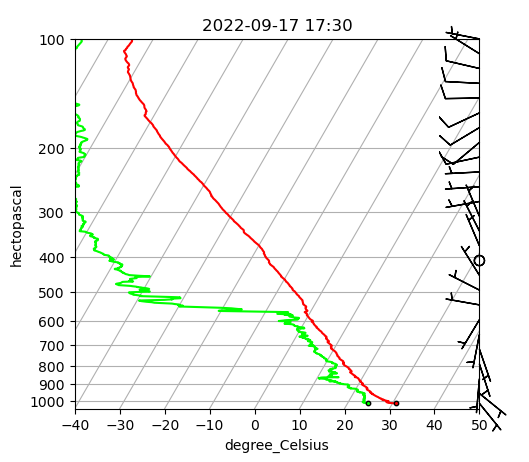

In [7]:
fig = plt.figure()
skew = SkewT(fig)
skew.plot(p, T, 'r')
skew.plot(p, Td, 'lime')
skew.ax.scatter([T[0]], [p[0]], color='r', s=10, edgecolors='k', zorder=5)
skew.ax.scatter([Td[0]], [p[0]], color='lime', s=10, edgecolors='k', zorder=5)
skew.plot_barbs(p[mask], u[mask], v[mask])

skew.ax.set_title(f'{time.astype('datetime64[m]').astype('O')[0].strftime('%Y-%m-%d %H:%M')}')

In [8]:
index_of_0c = np.argmin(np.abs(arm_ds.tdry.data))
index_of_hmg_frz = np.argmin(np.abs(arm_ds.tdry.data + 40))

print(f'Height of 0C: {arm_ds.alt.data[index_of_0c]/1000:.2f} km')
print(f'Height of -40C: {arm_ds.alt.data[index_of_hmg_frz]/1000:.2f} km')

Height of 0C: 4.69 km
Height of -40C: 10.88 km


In [9]:
xr.open_dataset('/Volumes/LtgSSD/tobac_saves/tobac_Save_20220602/Features_Precip.nc')

<xarray.Dataset> Size: 3MB
Dimensions:                  (index: 16210)
Coordinates:
  * index                    (index) int64 130kB 0 1 2 3 ... 16207 16208 16209
Data variables: (12/13)
    frame                    (index) int64 130kB ...
    idx                      (index) int64 130kB ...
    hdim_1                   (index) float64 130kB ...
    hdim_2                   (index) float64 130kB ...
    num                      (index) int64 130kB ...
    threshold_value          (index) float64 130kB ...
    ...                       ...
    time                     (index) datetime64[ns] 130kB ...
    timestr                  (index) <U19 1MB ...
    projection_y_coordinate  (index) float64 130kB ...
    projection_x_coordinate  (index) float64 130kB ...
    ncells                   (index) float64 130kB ...
    areas                    (index) float64 130kB ...